In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
medDoc = pd.read_csv('data/medicalDoctors.csv')
pharm = pd.read_csv('data/pharmacists.csv')
lifeExp = pd.read_csv('data/HALElifeExpectancyAtBirth.csv')

# Checking null values
print(medDoc.isnull().sum(), '\n')
print(pharm.isnull().sum(), '\n')
print(lifeExp.isnull().sum(), '\n')

Location         0
Period           0
Indicator        0
First Tooltip    0
dtype: int64 

Location         0
Period           0
Indicator        0
First Tooltip    0
dtype: int64 

Location         0
Period           0
Indicator        0
Dim1             0
First Tooltip    0
dtype: int64 



In [40]:
medDoc.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41


In [41]:
pharm.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Pharmacists (per 10,000)",0.47
1,Afghanistan,2015,"Pharmacists (per 10,000)",0.50
2,Afghanistan,2014,"Pharmacists (per 10,000)",0.51
3,Afghanistan,2012,"Pharmacists (per 10,000)",0.27
4,Afghanistan,2011,"Pharmacists (per 10,000)",0.28


In [48]:
lifeExp.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,53.95
1,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Male,54.73
2,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Female,53.15
3,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
4,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Male,52.78


In [43]:
# Merge pharmacists and doctors dataframes on location and period
medProf = medDoc.merge(pharm, on=['Location', 'Period'], how='inner')
medProf['Total Density'] = medProf['First Tooltip_x'] + medProf['First Tooltip_y']

# Drop unnecessary columns
columns_to_drop = ['Indicator_x', 'Indicator_y']
medProf = medProf.drop(columns=columns_to_drop)

# Rename the columns
medProf = medProf.rename(columns={'First Tooltip_x': 'Pharmacists Density','First Tooltip_y': 'Doctors Density' })
medProf.head()

,Location,Period,Pharmacists Density,Doctors Density,Total Density
0,Afghanistan,2016,2.78,0.47,3.25
1,Afghanistan,2015,2.85,0.50,3.35
2,Afghanistan,2014,2.98,0.51,3.49
3,Afghanistan,2012,2.41,0.27,2.68
4,Afghanistan,2011,2.52,0.28,2.80


In [44]:
# Inner join medProf and lifeExp dataframes
medProf_lifeExp = medProf.merge(lifeExp, on=['Location', 'Period'], how='inner')
medProf_lifeExp

,Location,Period,Pharmacists Density,Doctors Density,Total Density,Indicator,Dim1,First Tooltip
0,Afghanistan,2015,2.85,0.500,3.350,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
1,Afghanistan,2015,2.85,0.500,3.350,Healthy life expectancy (HALE) at birth (years),Male,52.78
2,Afghanistan,2015,2.85,0.500,3.350,Healthy life expectancy (HALE) at birth (years),Female,52.44
3,Afghanistan,2010,2.37,0.280,2.650,Healthy life expectancy (HALE) at birth (years),Both sexes,51.13
4,Afghanistan,2010,2.37,0.280,2.650,Healthy life expectancy (HALE) at birth (years),Male,51.51
...,...,...,...,...,...,...,...,...
658,Zimbabwe,2015,1.82,0.100,1.920,Healthy life expectancy (HALE) at birth (years),Male,49.62
659,Zimbabwe,2015,1.82,0.100,1.920,Healthy life expectancy (HALE) at birth (years),Female,52.59
660,Zimbabwe,2010,1.27,0.043,1.313,Healthy life expectancy (HALE) at birth (years),Both sexes,45.22
661,Zimbabwe,2010,1.27,0.043,1.313,Healthy life expectancy (HALE) at birth (years),Male,44.25


In [45]:
# Drop unnecessary columns
columns_to_drop = ['Indicator']
medProf_lifeExp = medProf_lifeExp.drop(columns=columns_to_drop)

# Rename the columns
medProf_lifeExp = medProf_lifeExp.rename(columns={'Dim1': 'Sex','First Tooltip': 'Years' })
medProf_lifeExp.head()

,Location,Period,Pharmacists Density,Doctors Density,Total Density,Sex,Years
0,Afghanistan,2015,2.85,0.50,3.35,Both sexes,52.60
1,Afghanistan,2015,2.85,0.50,3.35,Male,52.78
2,Afghanistan,2015,2.85,0.50,3.35,Female,52.44
3,Afghanistan,2010,2.37,0.28,2.65,Both sexes,51.13
4,Afghanistan,2010,2.37,0.28,2.65,Male,51.51


In [46]:
# Some summary statistics
mean_total_density_2015 = np.mean(medProf_lifeExp[medProf_lifeExp['Period'] == 2015]['Total Density'])
print(f'The mean of the density of the medical professionals in 2015 is {mean_total_density_2015:.2f}')

mean_total_density_2000 = np.mean(medProf_lifeExp[medProf_lifeExp['Period'] == 2000]['Total Density'])
print(f'The mean of the density of the medical professionals in 2000 is {mean_total_density_2000:.2f}')

The mean of the density of the medical professionals in 2015 is 25.65
The mean of the density of the medical professionals in 2000 is 26.77


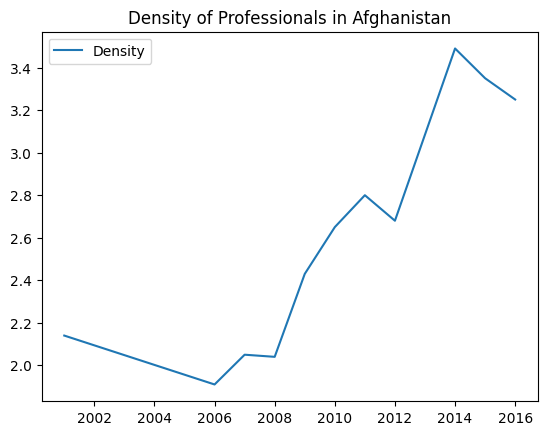

In [56]:
Afghanistan_total_density = medProf[medProf['Location'] == 'Afghanistan']['Total Density']
Year = medProf[medProf['Location'] == 'Afghanistan']['Period'].unique()

plt.plot(Year, Afghanistan_total_density, label='Density')
plt.title('Density of Professionals in Afghanistan')
plt.legend()
plt.show()